#***Classification of News Headlines using SkLearn Dataset fetch_20newsgroup***
## **Imporing Libraries**

In [1]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns; sns.set()

## **Categories we have in dataset**

In [2]:
# Getting the data

data = fetch_20newsgroups()

# Categories of news

data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# Setting the categories

catg = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

 # Splitting data into training and testing

features_train = fetch_20newsgroups(subset='train', categories=catg)
features_test = fetch_20newsgroups(subset='test', categories=catg)

## **View of the dataset**

In [7]:
# Printing any data from features_train

print(type(features_train.data))
print(features_train.data[0])

<class 'list'>
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [8]:
# Printing any data from features_test

print(features_test.data[0])

From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



In [9]:
# Number of training and testing data

print(len(features_train.data))
print(len(features_test.data))

11314
7532


# **Finding weights for different words in the document and training the model using TfidVectorizer and classifying using Naive Bayes**

In [10]:
# Finding weights for different words in the document and training the model 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Making classifier using Multinomial NB
clf = make_pipeline(TfidfVectorizer(), MultinomialNB())

clf.fit(features_train.data, features_train.target)

preds = clf.predict(features_test.data)

# **Visualizing he results using seaborn heatmap using confusion matrix**

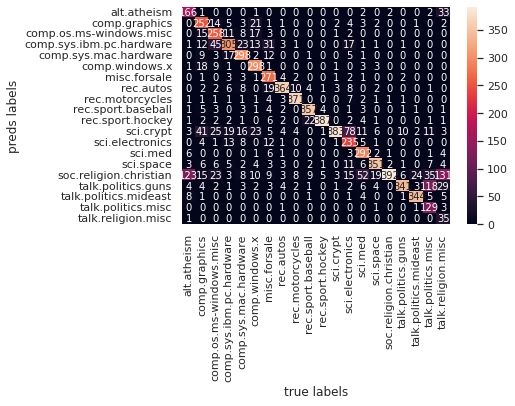

In [16]:
# Visualizing he results using seaborn heatmap using confusion matrix
%matplotlib inline
# Creating confusion matrix
from sklearn.metrics import  confusion_matrix
mat = confusion_matrix(features_test.target, preds)

# Plotting confusion matrix using seaborn
sns.heatmap(mat.T, annot=True, fmt='d', cbar=True,
            xticklabels = features_train.target_names,
            yticklabels=features_train.target_names)

plt.xlabel('true labels');
plt.ylabel('preds labels');

# **Predicting On New Data**

In [27]:
# Creating a function for predicting on new data

def predict_category(str):
  prediction = clf.predict([str])
  return catg[prediction[0]]

In [18]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [20]:
predict_category('Farrari is pritter than Audi')

'rec.autos'

In [21]:
predict_category('Laxmi is goddess of India')

'soc.religion.christian'

In [22]:
predict_category('Moon is Earth\'s natural satellite')

'sci.space'

In [25]:
predict_category('Narendra Modi is the prime minister of India')

'talk.politics.mideast'

In [26]:
predict_category('You might need to visit a doctor')

'sci.med'